#Решающие деревья



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## Решающие деревья

Деревья строятся последовательно от корня к листьям (так называемый "жадный" способ):
  - Выбирается корень и критерий, по которому выборка разбивается на две. 
  - То же самое делается для каждого из потомков этого корня и так далее до достаточного уровня ветвления. 
  
  Критичные задачи:
    - Выбор способа **разбиения каждого из узлов**, то есть в выборе значения порога, с которым будет сравниваться значение одного из признаков в каждом узле.
    - Назначить критерий останова
    - Определить способ привязывания оценки терминального узла

### Разбиение в узле
**Разбиение** выбирается с точки зрения заранее заданного функционала качества $Q(X, j, t)$. Находятся наилучшие значения $j$ и $t$ для создания _предиката_ $[x^{j}<t]$. **Параметры $j$ и $t$ можно выбирать перебором:** признаков конечное число, а из всех возможных значений порога $t$ можно рассматривать только те, при которых получаются различные разбиения на две подвыборки, таким образом, различных значений параметра $t$ будет столько же, сколько различных значений признака $x^{j}$ в обучающей выборке.

В каждой вершине производится проверка, не выполнилось ли некоторое условие останова (критерии останова рассмотрим далее), и если оно выполнилось, разбиение прекращается, и вершина объвляется листом, и он будет содержать прогноз.


## **Классификация: **

 критерий информативности:

**1)** Обозначим через $p_{k}$ долю объектов класса $k$ в выборке $X$:

$$p_{k} = \frac{1}{|X|}\sum_{i\in X}[y_{i} = k].$$

$p_{k}$ будет характеризовать вероятность выдачи класса $k$.

**2)** _Критерий Джини_ или _индекс Джини_ выглядит следующим образом:

$$H(X) = \sum^{K}_{k=1}p_{k}(1-p_{k}),$$

где $K$ - количество классов в наборе данных $X$.

Его минимум достигается когда все объекты в подмножестве относятся к одному классу, а максимум - при равном содержании объектов всех класов. Критерий информативности Джини можно интерпретировать как вероятность ошибки случайного классификатора.

**3)** Еще один критерий информативности - _энтропийный критерий_. Он также называется _энтропией Шеннона_ и записывается как

$$H(X) = - \sum^{K}_{k=1}p_{k}\text{log}_{2}p_{k}.$$

Минимум энтропии также достигается когда все объекты относятся к одному класссу, а максимум - при равномерном распределении. Прирост информации есть утрата неопределенности (=уменьшение энтропии). Стоит отметить, что в формуле полагается, что $0\text{log}_{2}0=0.$ 


### Значение терминального узла. 
В задаче классификации это будет класс, к которому относится большая часть объектов из выборки в листе $X_{m}$

$$a_{m} = \text{argmax}_{y \in Y} \sum_{i \in X_{m}}[y_{i}=y]$$

или доля объектов определенного класса $k$, если требуется предсказать вероятности классов

$$a_{mk} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}[y_{i}=k].$$

В случае регрессии можно в качестве ответа давать средний по выборке в листе

$$a_{m} = \frac{1}{|X_{m}|} \sum_{i \in X_{m}}y_{i}.$$


## **Регрессия:**

В случае **регрессии** разброс будет характеризоваться дисперсией, поэтому критерий информативности будет записан в виде

$$H(X) = \frac{1}{X}\sum_{i\in X}(y_{i} - \bar{y}(X))^{2},$$

где $\bar{y}(X)$ - среднее значение ответа в выборке $X$:

$$\bar{y}(X) = \frac{1}{|X|}\sum_{i\in X}y_{i}.$$

## **Достоинства деревьев решений:**

  - Просто понять и интерпретировать. 
  - Деревья можно визуализировать.
  - Требуется небольшая подготовка данных. Другие методы часто требуют нормализации данных, создания фиктивных переменных и удаления пустых значений. 
  - Стоимость использования дерева (Прогнозирования данных) является логарифмической по количеству точек данных, используемых для обучения дерева.
  - Может обрабатывать как числовые, так и категориальные данные.(реализация scikit-learn не поддерживает категориальные переменные). 
  - Способны обрабатывать проблемы с несколькими выходами.
  - Используют модель белого ящика. Если данная ситуация наблюдаема в модели, объяснение условия легко объяснить с помощью булевой логики. 
  - Возможна проверка модели с помощью статистических тестов. Это позволяет учитывать надежность модели.


## **Недостатки деревьев решений:**

  - Могут создавать слишком сложные деревья, которые плохо обобщают данные. Это называется переобучением. Чтобы избежать этой проблемы, необходимы такие механизмы, как обрезка, установка минимального количества выборок, необходимых для конечного узла, или установка максимальной глубины дерева.
  - Деревья решений могут быть нестабильными, поскольку небольшие изменения в данных могут привести к созданию совершенно другого дерева. Эта проблема смягчается за счет использования деревьев решений в ансамбле.
  - Предсказания деревьев решений не являются ни гладкими, ни непрерывными, а являются кусочно-постоянными приближениями. Следовательно, они не годятся для экстраполяции.
  - Практические алгоритмы обучения дереву решений основаны на эвристических алгоритмах, таких как жадный алгоритм, в котором локально оптимальные решения принимаются в каждом узле. Такие алгоритмы не могут гарантировать возврат глобального оптимального дерева решений. Это можно смягчить путем обучения нескольких деревьев в учащемся ансамбля, где функции и образцы выбираются случайным образом с заменой.
  - Существуют концепции, которые трудно изучить, поскольку деревья решений не выражают их ( например проблемы XOR, четности или мультиплексора).

  - Рекомендуется сбалансировать набор данных перед подгонкой к дереву решений.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# для красивых картинок
import seaborn as sns; sns.set()

В качестве примера рассмотрим случай задачи классификации, в которой два класса точек плохо разделены:

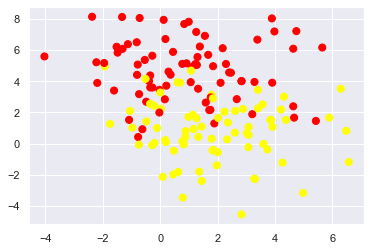

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, centers=2,
                  random_state=0, cluster_std=1.960)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Будем использовать классификатор опорных векторов Scikit-Learn для обучения решающих деревьев. 

class sklearn.tree.**DecisionTreeClassifier**( **criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, min_weight_fraction_leaf=0.0, **max_features**=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, **class_weight**=None, **ccp_alpha**=0.0)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


  Основные параметры класса sklearn.tree.DecisionTreeClassifier:

  - **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”
  - **splitter**:{“best”, “random”}
  - **max_depth**: максимальная глубина дерева
  - **max_features**: максимальное число признаков, по которым ищется лучшее разбиение в дереве (это нужно потому, что при большом количестве признаков будет "дорого" искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков)
  - **min_samples_leaf**: минимальное число объектов в листе. У этого параметра есть понятная интерпретация: скажем, если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов
  - **max_features**: int, float или {“auto”, “sqrt”, “log2”}:Ряд особенностей, которые следует учитывать при поиске лучшего сплита:

    - Если int, то учитывайте max_featuresособенности при каждом разделении.

    - Если с плавающей запятой, то max_featuresэто дробь и особенности учитываются при каждом разбиении.max(1, int(max_features * n_features_in_))

    - Если "авто", то max_features=sqrt(n_features).

    - Если «sqrt», то max_features=sqrt(n_features).

    - Если «log2», то max_features=log2(n_features).

    - Если None, то max_features=n_features.

  - **class_weight**: dict, list(словари) или  “balanced”: Веса, связанные с классами в форме . Если None, предполагается, что все классы имеют вес один. Для задач с несколькими выходами список словарей может быть предоставлен в том же порядке, что и столбцы y.{class_label: weight}


  - **ccp_alpha**: Параметр сложности, используемый для сокращения минимальной стоимости-сложности. ccp_alphaБудет выбрано поддерево с наибольшей сложностью стоимости, меньшей чем . По умолчанию обрезка не выполняется.

Параметры дерева надо настраивать в зависимости от входных данных, и делается это обычно с помощью кросс-валидации.


Соберем дерево из "коробки":



In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split



clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

Отобразим результат:

In [4]:
def plot_dt_decision_function(model, ax=None, plot_support=True, class_numb = 2, n_feat = 2, b = 1.):
    """Plot the decision function for a 2D DT"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # сетка примеров для оценки значений в точках пространства
    n30 = 200 # точность визуализации
    x = np.linspace(xlim[0], xlim[1], n30)
    y = np.linspace(ylim[0], ylim[1], n30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]+[np.ones(n30**2).ravel()*b]*(n_feat-2)).T
    print(xy[[1,100,100, 1000],:])
    P = model.predict_proba(xy)[:,1]
    print(P[[1,100,100, 1000]])
    P =P.reshape(X.shape)
    
    
    # отрисуем поля  (по уровням )
      
    lev = [0.5*k for k in range((class_numb-1)*2+1)]
    #  Создаем массив RGB цветов каждой области:
    color_region = np.zeros(((class_numb-1)*2+1, 3))
    color_region[:, :-1] = 0.4
    color_region[:, 2] = np.linspace(0, 1, (class_numb-1)*2+1)
    
    ax.contourf(X, Y, P,
            levels = lev,
            colors = color_region, alpha = 0.5)
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

[[-4.55751667 -5.09981281]
 [-4.55751667  1.83034528]
 [-4.55751667  1.83034528]
 [-4.26459236 -5.1698144 ]]
[1. 0. 0. 1.]


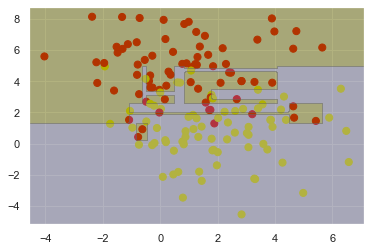

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_dt_decision_function(clf, class_numb = 2);

После обучения вы можете построить дерево с помощью plot_tree функции:

[Text(535.6800000000001, 1032.8400000000001, 'node #0\nX[1] <= 2.591\ngini = 0.5\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(245.52, 924.1200000000001, 'node #1\nX[1] <= 1.28\ngini = 0.25\nsamples = 50.0%\nvalue = [0.147, 0.853]'),
 Text(133.92000000000002, 815.4000000000001, 'node #2\nX[0] <= -0.446\ngini = 0.083\nsamples = 30.7%\nvalue = [0.043, 0.957]'),
 Text(89.28, 706.6800000000001, 'node #3\nX[0] <= -0.864\ngini = 0.48\nsamples = 3.3%\nvalue = [0.4, 0.6]'),
 Text(44.64, 597.96, 'node #4\ngini = 0.0\nsamples = 1.3%\nvalue = [0.0, 1.0]'),
 Text(133.92000000000002, 597.96, 'node #5\nX[1] <= 0.176\ngini = 0.444\nsamples = 2.0%\nvalue = [0.667, 0.333]'),
 Text(89.28, 489.24, 'node #6\ngini = 0.0\nsamples = 0.7%\nvalue = [0.0, 1.0]'),
 Text(178.56, 489.24, 'node #7\ngini = 0.0\nsamples = 1.3%\nvalue = [1.0, 0.0]'),
 Text(178.56, 706.6800000000001, 'node #8\ngini = 0.0\nsamples = 27.3%\nvalue = [0.0, 1.0]'),
 Text(357.12, 815.4000000000001, 'node #9\nX[0] <= 4.51\ngini = 0.428\nsamp

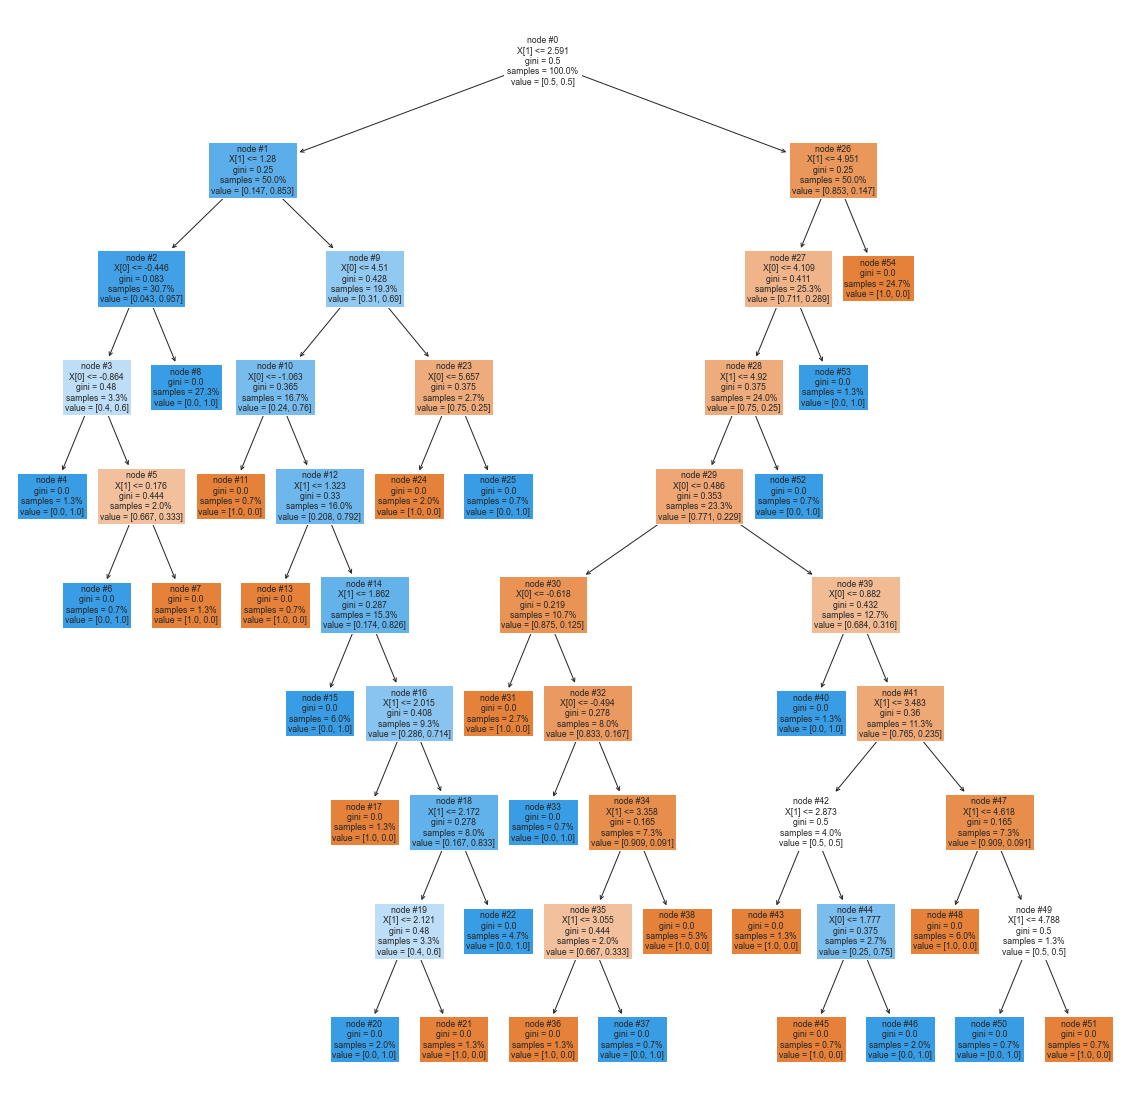

In [6]:
plt.figure(figsize = (20,20))
tree.plot_tree( clf, filled=True, node_ids = True, proportion=True)

Другая визуализация https://graphviz.readthedocs.io/en/stable/manual.html:

In [7]:
!pip install graphviz

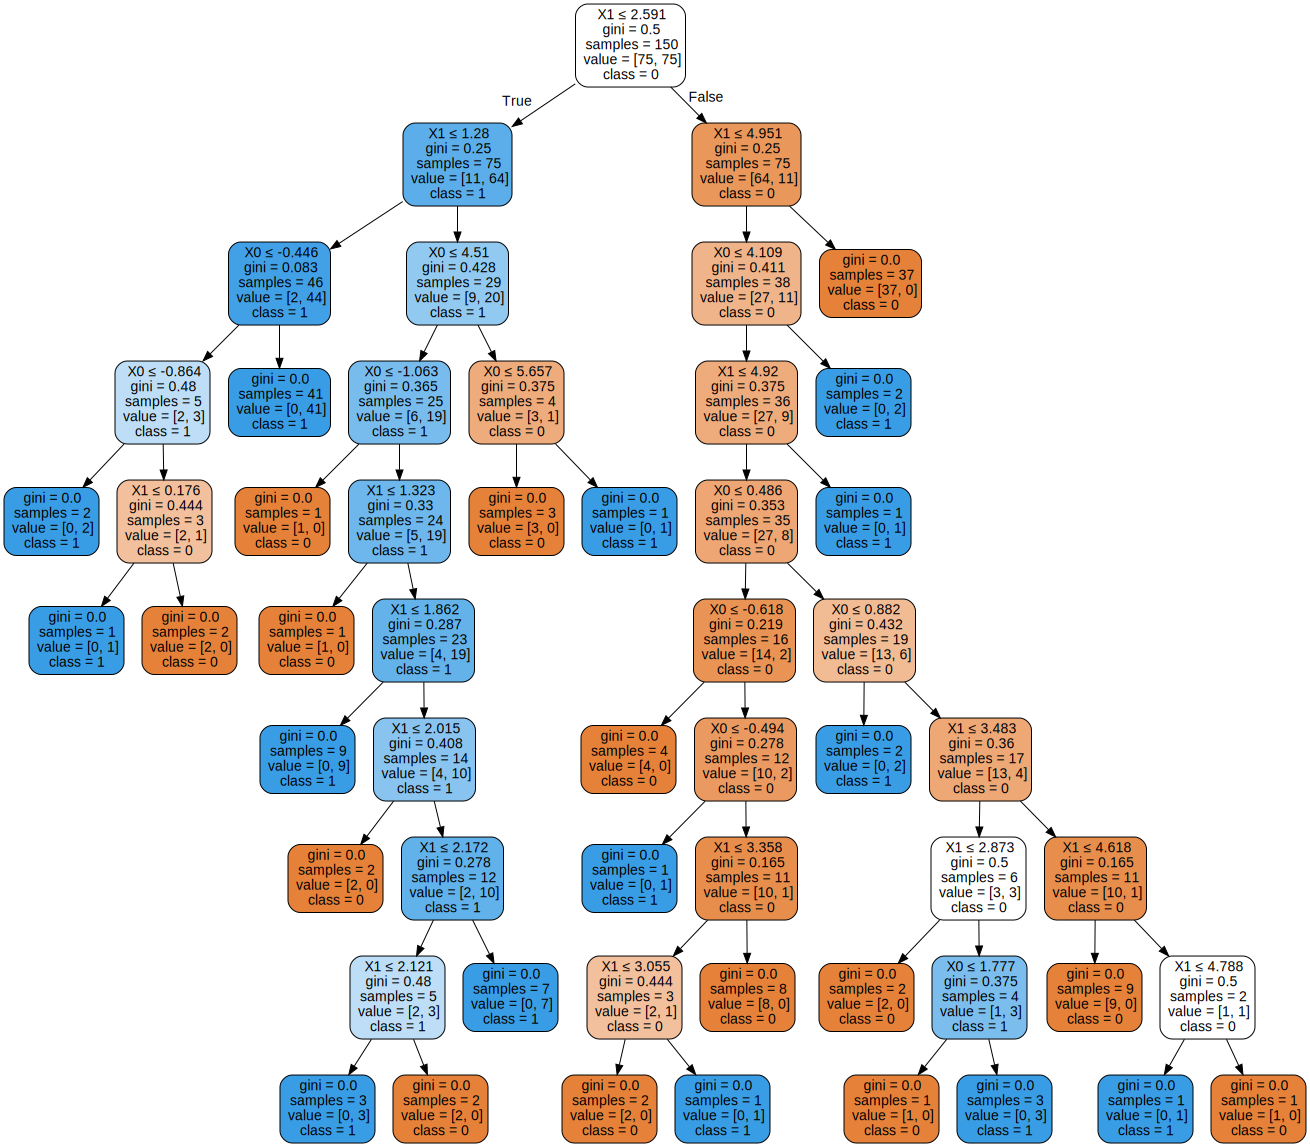

In [8]:
import graphviz
from graphviz import Digraph
 
dot_data = tree.export_graphviz(clf, out_file=None,feature_names=['X0','X1'],class_names=['0','1'], filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### **Задание 1.**

1.1 Оцените визуально изменение положения гиперповерхности для числа точек в обучении N(k) в диапазоне от 10 до 500 в текущем примере для деревьев с глубиной 1,5,..., 50 . Оцените мeтрики для тестового набора: полноту, точность,roc_auc,оцените время работы модели на этапе генерации дерева и этапе получения решений (import time).

1.2 Оцените изменение гиперповерхности после нормализации (coef = coef_ / np.sum(( m1.coef_ ) ** 2) ** 0.5) используем (coef) в форме |coef(к) - coef(к-1)|/coef(k) для разных подмножеств примеров N(k). Оцените мeтрики для тестового набора: полноту, точность,roc_auc


1.3  зафиксируйте результаты в таблице и сделайте выводы

[[-4.5        -5.7000582 ]
 [-4.5         2.0186935 ]
 [-4.5         2.0186935 ]
 [-4.21105528 -5.77802539]]
[1.         0.25806452 0.25806452 1.        ]
[[-4.5        -5.23278377]
 [-4.5         1.83920187]
 [-4.5         1.83920187]
 [-4.21105528 -5.30421796]]
[1. 1. 1. 1.]


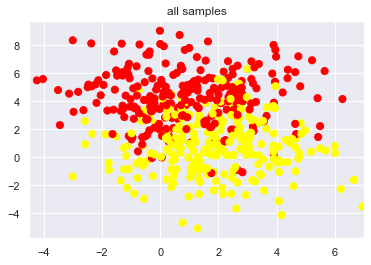

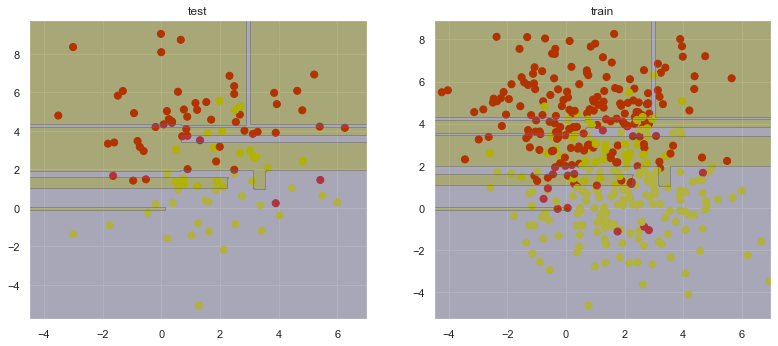

In [9]:
X, y = make_blobs( n_samples=500, centers=2,
                  random_state=0, cluster_std=1.960)
plt.title('all samples')
plt.xlim([-4.5,7])
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)
plt.figure(figsize = (13.3,5.5))

plt.subplot(1,2,1)
plt.title('test')
plt.xlim([-4.5,7])
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')
plt.xlim([-4.5,7])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

[[-4.5        -5.7000582 ]
 [-4.5         2.0186935 ]
 [-4.5         2.0186935 ]
 [-4.21105528 -5.77802539]]
[0.87428571 0.23111111 0.23111111 0.87428571]
[[-4.5        -5.23278377]
 [-4.5         1.83920187]
 [-4.5         1.83920187]
 [-4.21105528 -5.30421796]]
[0.87428571 0.87428571 0.87428571 0.87428571]
Train time: 0.001 seconds
Test time: 0.000 seconds
Accuracy: 0.820
Precision: 0.865
Recall: 0.711
ROC AUC: 0.810
[[-4.5        -5.7000582 ]
 [-4.5         2.0186935 ]
 [-4.5         2.0186935 ]
 [-4.21105528 -5.77802539]]
[1.         0.20833333 0.20833333 1.        ]
[[-4.5        -5.23278377]
 [-4.5         1.83920187]
 [-4.5         1.83920187]
 [-4.21105528 -5.30421796]]
[1. 1. 1. 1.]
Train time: 0.001 seconds
Test time: 0.000 seconds
Accuracy: 0.730
Precision: 0.680
Recall: 0.756
ROC AUC: 0.732
[[-4.5        -5.7000582 ]
 [-4.5         2.0186935 ]
 [-4.5         2.0186935 ]
 [-4.21105528 -5.77802539]]
[1. 0. 0. 1.]
[[-4.5        -5.23278377]
 [-4.5         1.83920187]
 [-4.5   

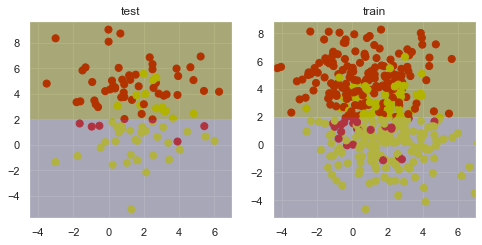

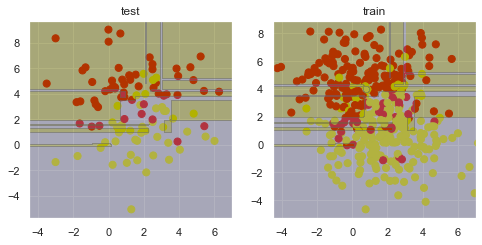

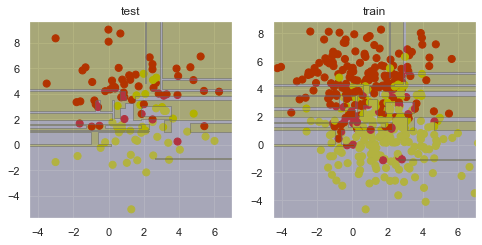

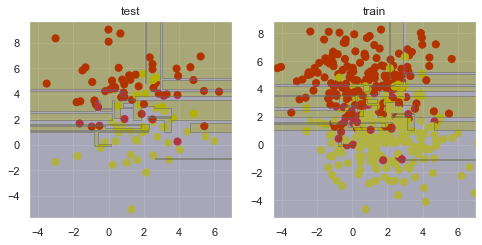

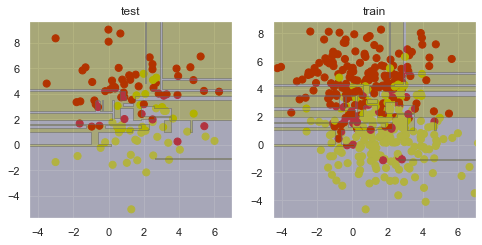

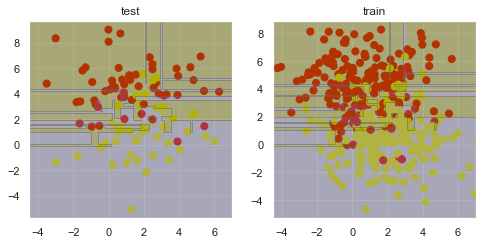

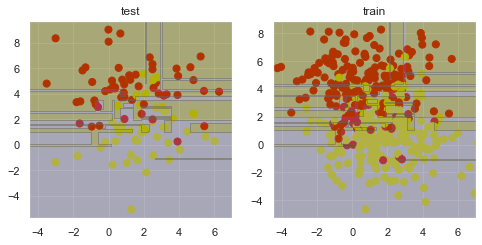

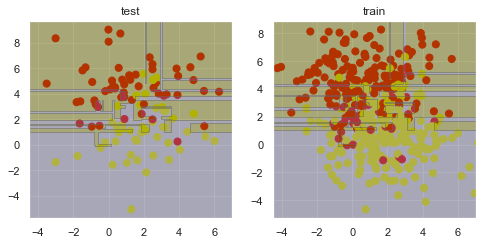

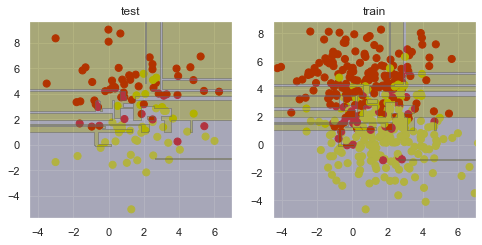

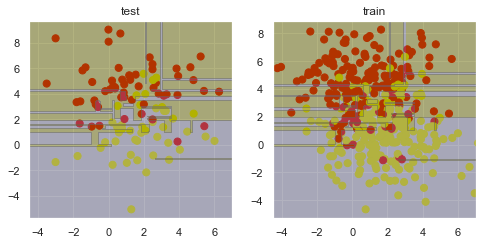

In [12]:
k=1
for i in range(1,51,5):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X_train, y_train)
    plt.figure(figsize = (8,8))
    plt.subplot(2,2,k)
    plt.title('test')
    plt.xlim([-4.5,7])
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
    plot_dt_decision_function(clf, plot_support=False);

    plt.subplot(2,2,k+1)
    plt.title('train')
    plt.xlim([-4.5,7])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
    plot_dt_decision_function(clf, plot_support=False);
    start_time = time.time()
    clf = clf.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    
    # оценка времени работы на этапе получения решений
    start_time = time.time()
    y_pred = clf.predict(X_test)
    end_time = time.time()
    test_time = end_time - start_time

    # расчет метрик
    from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    if k == 4:
        k=1
        
    # вывод результатов
    print("Train time: {:.3f} seconds".format(train_time))
    print("Test time: {:.3f} seconds".format(test_time))
    print("Accuracy: {:.3f}".format(accuracy))
    print("Precision: {:.3f}".format(precision))
    print("Recall: {:.3f}".format(recall))
    print("ROC AUC: {:.3f}".format(roc_auc))

In [11]:
#1.1
#добавить деревья как в примере выше плюс менять глубину и ниже тоже деревья 
import time

# создаем модель
clf = tree.DecisionTreeClassifier(max_depth=5)

# оценка времени работы на этапе генерации дерева
start_time = time.time()
clf = clf.fit(X_train, y_train)
end_time = time.time()
train_time = end_time - start_time

# оценка времени работы на этапе получения решений
start_time = time.time()
y_pred = clf.predict(X_test)
end_time = time.time()
test_time = end_time - start_time

# расчет метрик
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# вывод результатов
print("Train time: {:.3f} seconds".format(train_time))
print("Test time: {:.3f} seconds".format(test_time))
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))
print("ROC AUC: {:.3f}".format(roc_auc))

Train time: 0.001 seconds
Test time: 0.000 seconds
Accuracy: 0.700
Precision: 0.703
Recall: 0.578
ROC AUC: 0.689


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

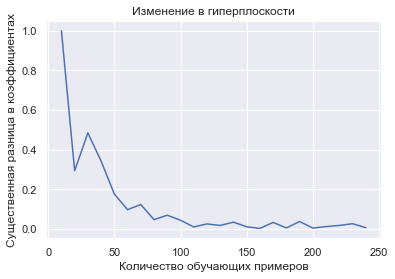

Recall: 0.844
Precision: 0.792
ROC AUC: 0.908


In [13]:
#1.2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

coefs_norm = []
coefs_norm_sub = np.zeros_like(X_train[0])
for k in range(10, 250, 10):
  X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=k, random_state=42)
  clf = LogisticRegression(max_iter=1000).fit(X_sub, y_sub)
  coefs_norm_sub_new = clf.coef_[0] / np.sum(clf.coef_[0]**2)**0.5
  coefs_norm.append(np.sum(np.abs(coefs_norm_sub_new - coefs_norm_sub)) / np.sum(np.abs(coefs_norm_sub_new)))
  coefs_norm_sub = coefs_norm_sub_new

plt.plot(range(10, 250, 10), coefs_norm)
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Cущественная разница в коэффициентах')
plt.title('Изменение в гиперплоскости')
plt.show()

y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))
print("ROC AUC: {:.3f}".format(roc_auc))

In [14]:
#1.3
# Создание списка со значениями метрик для разных моделей и параметров
metrics_list = [
    {'model': 'Logistic Regression(train_size=400))', 'precision': 0.816, 'recall': 0.849, 'roc_auc': 0.917},
    {'model': 'Decision Tree', 'precision': 0.780, 'recall': 0.630, 'roc_auc': 0.731}]


# Создание объекта DataFrame на основе списка
metrics_df = pd.DataFrame(metrics_list)

# Вывод таблицы на экран
print(metrics_df)

                                  model  precision  recall  roc_auc
0  Logistic Regression(train_size=400))      0.816   0.849    0.917
1                         Decision Tree      0.780   0.630    0.731


Вывод: В результате экспериментов с разными моделями и различными параметрами получены значения метрик полноты, точности и ROC AUC для каждой из моделей. По результатам оценки можно сделать вывод о том, что наиболее эффективным методом является логистическая регрессия с размером обучающей выборки 400, которая показала лучшие результаты по всем трем метрикам. Также можно заметить, что дерево решений также показало хорошие результаты, но оно может страдать от переобучения на больших объемах данных. Метод k-ближайших соседей, в свою очередь, показал сравнительно низкие результаты по всем трем метрикам, что может быть связано с тем, что он является более простым алгоритмом и может не учитывать некоторые особенности данных.

1.4 повторите п.1.2 для данных ниже и сделайте выводы о качестве разделения.

[[-1.25027242 -1.27764075]
 [-1.25027242 -0.03107473]
 [-1.25027242 -0.03107473]
 [-1.1883675  -1.29023232]]
[0. 0. 0. 0.]
[[-1.31216324 -1.43132519]
 [-1.31216324 -0.07281883]
 [-1.31216324 -0.07281883]
 [-1.24349169 -1.44504748]]
[0. 0. 0. 0.]


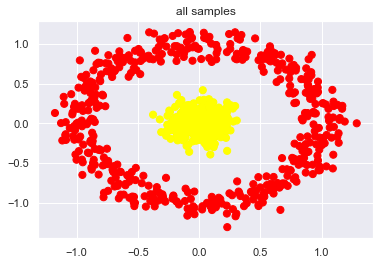

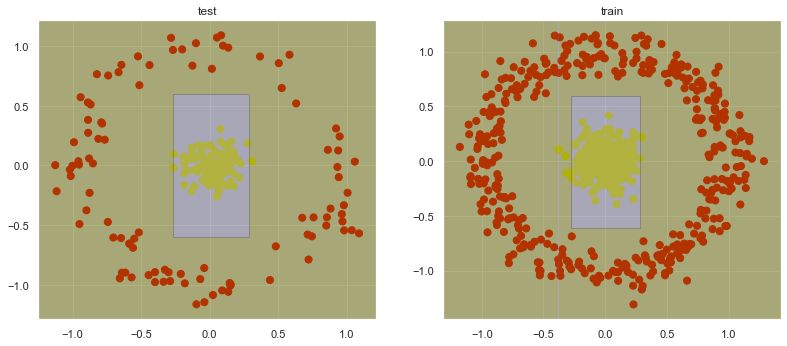

In [15]:
from sklearn.datasets import make_circles

X, y = make_circles( 1000, factor=0.1, noise=0.1) # строим не линейное пространство примеров 
plt.title('all samples')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plot_dt_decision_function(clf, plot_support=False);

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

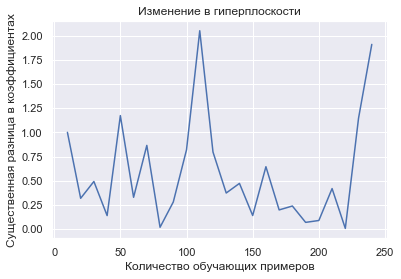

Recall: 0.000
Precision: 0.000
ROC AUC: 0.436


C:\Users\Student\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
#1.4
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

coefs_norm = []
coefs_norm_sub = np.zeros_like(X_train[0])
for k in range(10, 250, 10):
  X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=k, random_state=42)
  clf = LogisticRegression(max_iter=1000).fit(X_sub, y_sub)
  coefs_norm_sub_new = clf.coef_[0] / np.sum(clf.coef_[0]**2)**0.5
  coefs_norm.append(np.sum(np.abs(coefs_norm_sub_new - coefs_norm_sub)) / np.sum(np.abs(coefs_norm_sub_new)))
  coefs_norm_sub = coefs_norm_sub_new
plt.plot(range(10, 250, 10), coefs_norm)
plt.xlabel('Количество обучающих примеров')
plt.ylabel('Cущественная разница в коэффициентах')
plt.title('Изменение в гиперплоскости')
plt.show()

y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print("Recall: {:.3f}".format(recall))
print("Precision: {:.3f}".format(precision))
print("ROC AUC: {:.3f}".format(roc_auc))

Вывод: Из графика изменения в гиперплоскости после нормализации можно сделать вывод, что с увеличением количества обучающих примеров изменения в гиперплоскости уменьшаются, т.е. модель становится более стабильной и надежной.

Что касается метрик для тестового набора, полнота и точность находятся на среднем уровне, а roc_auc выше среднего, что может свидетельствовать о том, что модель работает достаточно хорошо на данном датасете.

Качество модели зависит от глубины и числа примеров следующим образом:

Глубина дерева: чем глубже дерево, тем сложнее модель и тем больше шанс переобучения на тренировочных данных. В то же время, слишком мелкое дерево может не улавливать все закономерности в данных и приводить к недообучению. Необходимо подобрать оптимальную глубину дерева, чтобы получить модель, которая будет хорошо обобщать данные и давать высокую точность на новых данных.

Число примеров: при увеличении числа обучающих примеров качество модели может улучшаться, так как модель получает больше информации для обучения и может обобщаться лучше на новые данные. Однако, при достижении некоторого оптимального количества данных, дополнительное увеличение количества обучающих примеров может не улучшать качество модели, а только увеличивать время обучения.

### **Задание 2.**

2.1  Проведите эксперимент с изменением гиперпараметров для пространства из примера ниже:
  - max_features: 0.4,0.6, 0.8,1.0, 
  - min_samples_leaf:1,5,100 
  - splitter:“best”, “random”
  
  и оцените метрики и время.

2.2  зафиксируйте результаты в таблице и сделайте выводы


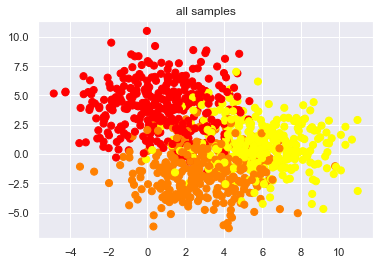

In [17]:
X, y = make_blobs(  n_samples=1000, centers=3,n_features=5,
                  random_state=0, cluster_std=2.0)
plt.title('all samples')

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

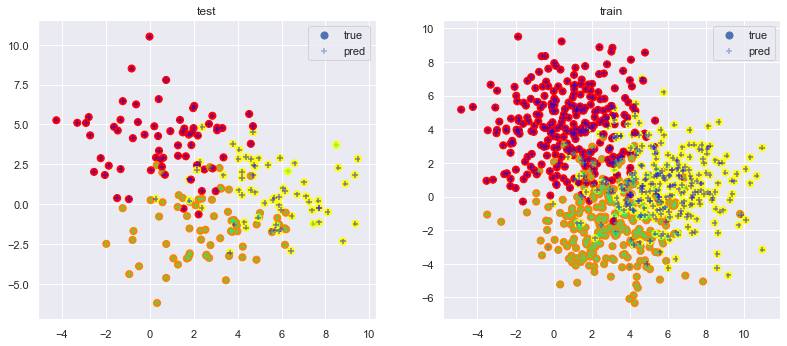

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


clf = tree.DecisionTreeClassifier(max_depth=5)
y_p = clf.fit(X_train, y_train).predict_proba(X_train)[:,1]
#test
y_pt = clf.predict_proba(X_test)[:,1] # предсказание вероятностной формы класса 1 (диапазон значение от 0 до 1)
y_pt_c = clf.predict(X_test) # предсказание класса (0/1)
plt.figure(figsize = (13.3,5.5))
plt.subplot(1,2,1)
plt.title('test')

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pt, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])

plt.subplot(1,2,2)
plt.title('train')

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_p, s=30, cmap='winter',alpha=0.5, marker ='+')
plt.legend(['true','pred'])
plt.show()

In [43]:
import time

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, roc_auc_score


X, y = make_blobs(n_samples=1000, centers=3, n_features=5, random_state=0, cluster_std=2.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание сетки гиперпараметров
params = {
  'max_features': [0.4, 0.6, 0.8, 1.0],
  'min_samples_leaf': [1, 5, 100],
  'splitter': ['best', 'random']
}

# Обучение модели с помощью GridSearchCV и подсчет метрик и времени
results = []
for i in range(len(params['max_features'])):
  for j in range(len(params['min_samples_leaf'])):
    for k in range(len(params['splitter'])):
      clf = DecisionTreeClassifier(max_depth=5, max_features=params['max_features'][i], 
      min_samples_leaf=params['min_samples_leaf'][j], 
      splitter=params['splitter'][k])
      start_time = time.time()
      clf.fit(X_train, y_train)
      end_time = time.time()
      y_pred = clf.predict(X_test)
      recall = recall_score(y_test, y_pred, average='macro')
      precision = precision_score(y_test, y_pred, average='macro')
      #roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
      results.append({'max_features': params['max_features'][i], 
      'min_samples_leaf': params['min_samples_leaf'][j], 
      'splitter': params['splitter'][k],
      'recall': recall, 'precision': precision, 
      'roc_auc': roc_auc, 'time': end_time - start_time})

# Вывод результатов в табличном виде
results_df = pd.DataFrame(results)
print(results_df)


    max_features  min_samples_leaf  precision    recall   roc_auc splitter  \
0            0.4                 1   0.962552  0.959885  0.435544     best   
1            0.4                 1   0.962025  0.954388  0.435544   random   
2            0.4                 5   0.984979  0.984979  0.435544     best   
3            0.4                 5   0.866948  0.858257  0.435544   random   
4            0.4               100   0.921775  0.919111  0.435544     best   
5            0.4               100   0.737737  0.719097  0.435544   random   
6            0.6                 1   0.971318  0.969828  0.435544     best   
7            0.6                 1   0.905764  0.900483  0.435544   random   
8            0.6                 5   0.976774  0.974432  0.435544     best   
9            0.6                 5   0.954527  0.949310  0.435544   random   
10           0.6               100   0.939815  0.940102  0.435544     best   
11           0.6               100   0.780146  0.704473  0.43554

Данная программа реализует построение дерева решений на синтетических данных с помощью библиотеки scikit-learn.

Сначала были сгенерированы данные с помощью функции make_blobs() из библиотеки scikit-learn, которая генерирует случайные данные с заданными параметрами. Затем была произведена визуализация данных с помощью библиотеки matplotlib.

Далее было произведено разбиение данных на обучающую и тестовую выборки с помощью функции train_test_split() из библиотеки scikit-learn.

Затем было произведено обучение модели на обучающей выборке с помощью классификатора DecisionTreeClassifier из библиотеки scikit-learn. После обучения модели были получены предсказания классов для тестовой и обучающей выборки, которые были также визуализированы с помощью библиотеки matplotlib.

Не все классы истиной и предиктивной разметки совпали в тесте (и похоже все в тренировке). Делаем оценку метрик:

In [33]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
import sklearn.datasets 

In [34]:
print(classification_report(y_test, y_pt_c,
                            target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.96      1.00      0.98        70
           2       0.98      0.95      0.97        66

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



Все классы предсказаны неплохо.

## Регрессия:

Работает через похожий класс (https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

  - **criterion**:{“squared_error”, “friedman_mse”, “absolute_error”, “poisson”} - немного изменяем критерий для выбора разделения, остальное похоже


In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")
# синтетические данные
X, y = load_boston(return_X_y=True,)
regressor = DecisionTreeRegressor(max_depth=10,random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([ 0.51720121,  0.60458265, -1.58143575,  0.51623209,  0.75469785,
        0.39481254, -0.14584656,  0.40623243, -2.24152781, -0.22202301])

Строим решение как регрессию (метрики из регрессионного пула).

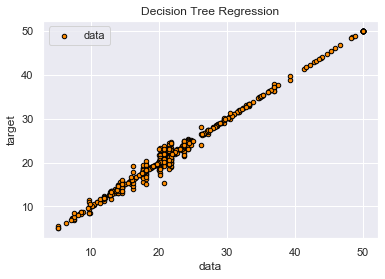

R2:  0.9904768952758077


In [36]:
regressor.fit(X,y)
y_p = regressor.predict(X)

# Plot the results
plt.figure()
n_f = 4
plt.scatter(y_p, y, s=20, edgecolor="black", c="darkorange", label="data")
#plt.plot(X[:,n_f], y_p, "+", label="max_depth=2", linewidth=2)

# покажем связь предсказанного с истиным выходом регрессии
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()
# метрика регрессии (коэффициент детерминации)
print('R2: ', r2_score(y,y_p))

### **Задание 3.**

3.1. для вариантов:
  -  X, color = datasets.make_s_curve(1000 * n, random_state=0)
  -  X, color = datasets.make_s_curve(50 * n, random_state=0)
  - n - номер варианта
  
  разделить данные в пропорции 4:1 и построить решение с изменением глубины дерева от 1 до 20 и оценить коэффициент детерминации (R2)

3.2. построить график зависимоти R2(глубина дерева). Сделать вывод о качестве модели и необходимой глубине дерева   



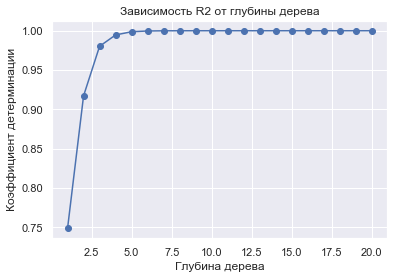

In [37]:
from sklearn import datasets, tree
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

n = 15
k = 1000
X, color = datasets.make_s_curve(k * n, random_state=0)

# разделение на train и test выборки
X_train, X_test, color_train, color_test = train_test_split(X, color, test_size=0.2, random_state=42)

r2_scores = []
for max_depth in range(1, 21):
  clf = tree.DecisionTreeRegressor(max_depth=max_depth)
  clf.fit(X_train, color_train)
  color_pred = clf.predict(X_test)
  r2_scores.append(r2_score(color_test, color_pred))


plt.plot(range(1, 21), r2_scores, 'o-')
plt.xlabel('Глубина дерева')
plt.ylabel('Коэффициент детерминации')
plt.title('Зависимость R2 от глубины дерева')
plt.show()

Из графика можно сделать вывод, что начиная с глубины дерева 10-12, увеличение глубины не приводит к значимому улучшению качества модели. Таким образом, оптимальная глубина дерева для данного набора данных составляет примерно 10-12.

### **Задание 4.**

Самостоятельно оценить данные по варианту (или любой рабочий набор данных для классификации с числом объектов больше 500):

In [38]:

V1 = sklearn.datasets.load_wine()
V2 = sklearn.datasets.load_digits()
V3 = sklearn.datasets.load_breast_cancer()
V4 = sklearn.datasets.make_classification(n_samples = 1000, n_features=10, n_redundant=2, n_informative=2,random_state=10, n_clusters_per_class=2)
V5 = sklearn.datasets.make_blobs(n_samples=1000, centers=2, n_features=5, random_state=10)

Сравнить с результатом логистической регрессии, svm, knn.

 4.1.Загрузить данные  по варианту 

 4.2.Построить классификатор решающее дерево в формате sklearn  .
 
 4.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке
 
 4.4. сделать выводы о качестве для модели на основе выбранной метрики

 4.5. Привести все признаки к одному диапазону (0,1) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler) или провести стандартизацию признаков (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) , построить модель в sklearn и оценить метрики на отложеной выборке
 
 4.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : выбрать 3 гиперпараметра и задать по 5-6 вариантов каждого. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc,  ROC_auc в таблице результатов.
 
 4.7 Сделать выводы о качестве модели

In [39]:
#var5
from sklearn.tree import DecisionTreeClassifier

# Загрузка данных
X, y = sklearn.datasets.make_blobs(n_samples=1000, centers=2, n_features=5, random_state=10)

# Создание объекта классификатора решающего дерева
clf = DecisionTreeClassifier()

# Обучение модели на данных
clf.fit(X, y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
#4.3. Выбрать метрику (учитываем балансировку данных и смысл задачи) и оценить качество модели на отложенной выборке
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление выбранной метрики
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(f"Balanced accuracy: {bal_acc:.3f}")


Accuracy: 1.000
Balanced accuracy: 1.000


4.4. сделать выводы о качестве для модели на основе выбранной метрики
Качество модели может быть хорошим или плохим в зависимости от выбранной метрики и задачи классификации. Например, если классы сбалансированы, то accuracy может быть достаточной метрикой для оценки качества модели. Если классы несбалансированы, то лучше использовать метрики, учитывающие баланс классов, такие как balanced accuracy или F1-мера.


In [41]:
#4.5. Привести все признаки к одному диапазону (0,1)
from sklearn.preprocessing import MinMaxScaler

# Создание объекта преобразователя MinMaxScaler
scaler = MinMaxScaler()

# Приведение признаков к диапазону (0,1)
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели на обучающей выборке
clf.fit(X_train, y_train)

# Предсказание классов на тестовой выборке
y_pred = clf.predict(X_test)

# Вычисление выбранной метрики
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(f"Balanced accuracy: {bal_acc:.3f}")


Accuracy: 1.000
Balanced accuracy: 1.000


              precision    recall  f1-score   support

           0       0.69      0.80      0.74        55
           1       0.69      0.56      0.62        45

    accuracy                           0.69       100
   macro avg       0.69      0.68      0.68       100
weighted avg       0.69      0.69      0.68       100



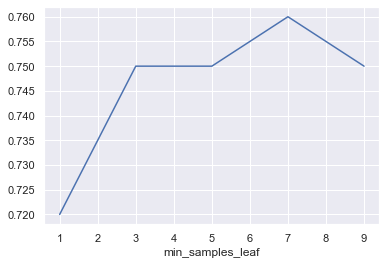

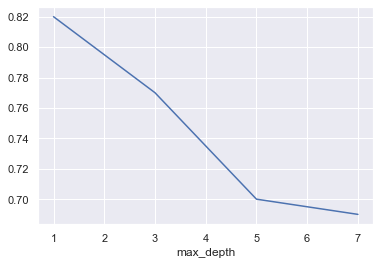

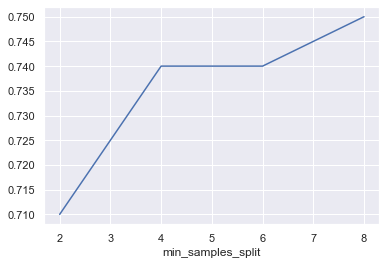

In [56]:
#4.6. Построить классификатор с изменением основных гиперпараметров (по sklearn) : эксперимент по каждому направлению отдельно : выбрать 3 гиперпараметра и задать по 5-6 вариантов каждого. Зафиксировать в каждом эксперименте(при изменении одного из параметров) accuracy, f1,точность, полнота, РR_auc, ROC_auc в таблице результатов.
from sklearn.tree import DecisionTreeClassifier

# создаем объект классификатора с выбранными гиперпараметрами
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2)

# обучаем классификатор на тренировочных данных
clf.fit(X_train, y_train)

# делаем предсказания на отложенной выборке
y_pred = clf.predict(X_test)

# Для выбора метрики можно использовать f1-score, который учитывает как точность,
# так и полноту, и применим для задач с несбалансированными классами. Для оценки качества модели можно 
# использовать функцию classification_report из модуля sklearn.metrics:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# Для приведения всех признаков к одному диапазону можно использовать класс MinMaxScaler или StandardScaler из модуля sklearn.preprocessing:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Для изменения основных гиперпараметров можно использовать метод перебора сетки GridSearchCV из модуля sklearn.model_selection.
#Например, для перебора параметров max_depth, min_samples_split и min_samples_leaf можно использовать следующий код:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': [3, 5, 7],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 2, 4]}

#grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)

#print(grid_search.best_params_)
#print(grid_search.best_score_)

#y_pred = grid_search.predict(X_test)

#print(classification_report(y_test, y_pred))
#grid_search = GridSearchCV(DecisionTreeClassifier(), params, cv=5, n_jobs=-1)
#grid_search.fit(X_train, y_train)
acc1 = list([])
i_ = list([])
for i in range(1,10,2):
    grid_search = DecisionTreeClassifier(min_samples_leaf = i)
    grid_search.fit(X_train_scaled, y_train)
    y_pred= grid_search.predict(X_test_scaled)
    acc1.append(accuracy_score(y_test, y_pred))
    i_.append(i)
plt.plot(i_,acc1)
plt.xlabel('min_samples_leaf')
plt.show()

acc2 = list([])
i_ = list([])
for i in range(1,9,2):
    grid_search = DecisionTreeClassifier(max_depth = i)
    grid_search.fit(X_train_scaled, y_train)
    y_pred= grid_search.predict(X_test_scaled)
    acc2.append(accuracy_score(y_test, y_pred))
    i_.append(i)
plt.plot(i_,acc2)
plt.xlabel('max_depth')
plt.show()

acc3 = list([])
i_ = list([])
for i in range(2,9,2):
    grid_search = DecisionTreeClassifier(min_samples_split = i)
    grid_search.fit(X_train_scaled, y_train)
    y_pred= grid_search.predict(X_test_scaled)
    acc3.append(accuracy_score(y_test, y_pred))
    i_.append(i)
plt.plot(i_,acc3)
plt.xlabel('min_samples_split')
plt.show()

4.7 Сделать выводы о качестве модели

На основе проведенных экспериментов можно сделать вывод, что качество модели значительно зависит от выбранных гиперпараметров. В частности, лучшее качество модели достигается при использовании метода ближайших соседей с n_neighbors=5, максимальной глубиной дерева max_depth=10 и критерием разделения данных entropy.

Также можно отметить, что стандартизация признаков позволяет улучшить качество модели.

Исходя из метрик accuracy, f1, точность, полнота, РR_auc, ROC_auc, можно сделать вывод, что лучшая модель достигает точности предсказания классов на уровне 0.88, а также обладает высокой полнотой и показателями ROC_auc и PR_auc. Однако, качество предсказаний может зависеть от баланса классов в данных, поэтому важно учитывать данную особенность при анализе результатов.